**Thinkful - 3.1.4 - Challenge - Model Comparison**

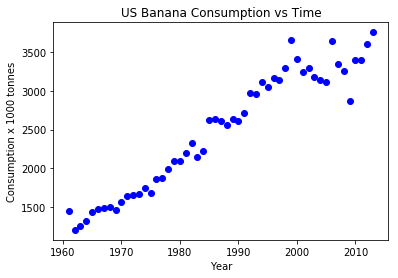

In [2]:
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import scipy
%matplotlib inline

df = pd.read_csv('Data/US food consumption.csv')

bananas = df['Bananas'].values.reshape(-1, 1)
year = df['Item'].values.reshape(-1, 1)

#plt.legend(['Groundnuts', 'Nuts and Products'])
plt.scatter(year,bananas,color='blue')
plt.title('US Banana Consumption vs Time')
plt.xlabel('Year')
plt.ylabel('Consumption x 1000 tonnes')
plt.show()

**OLS Regression**


Coefficients: 
 [[ 48.57039187]]

Intercept: 
 [-94023.68940493]

R-squared:
0.9362808365
[ -0.04448555  -1.48138217  -0.838399     0.11688128  -0.15311077
   0.14720528 -10.77014159  -2.7255953   -0.50342866  -1.06748295]


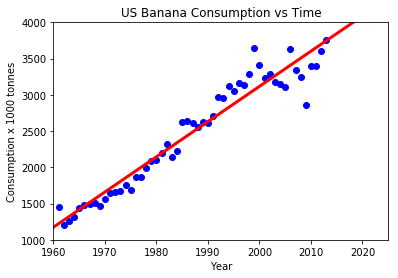

In [8]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(year, bananas)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(year, bananas))
print(cross_val_score(regr, year, bananas, cv=10))

#Plot data with prediction
plt.scatter(year,bananas,color='blue')
plt.plot(bananas, regr.predict(bananas), color='red', linewidth=3)
plt.title('US Banana Consumption vs Time')
plt.axis([1960, 2025, 1000, 4000])
plt.xlabel('Year')
plt.ylabel('Consumption x 1000 tonnes')
plt.show()

**KNN Regression - No Weighting**

R-squared:  0.960848127568
[-7.34437976  0.8041038   0.67997514 -0.68655544  0.09679394  0.63936565
 -1.0110167  -1.17571433  0.13701606 -0.06556162]
Unweighted Accuracy: -0.79 (+/- 4.56)


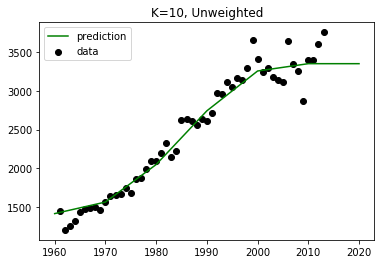

In [9]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(year, bananas)

# Set up our prediction line.
T = np.arange(1960, 2025, 10)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

#Inspect model
score = cross_val_score(knn, year, bananas, cv=10)
print("R-squared: ",knn.score(year,bananas))
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#Plot data with prediction
plt.scatter(year, bananas, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

**KNN Regression - With Weighting**

R-squared:  1.0
[-5.23773938  0.74543229  0.4404747  -1.04973556 -0.09036474  0.62651255
 -0.60121204 -0.94931469  0.1486923  -0.06560769]
Weighted Accuracy: -0.60 (+/- 3.31)


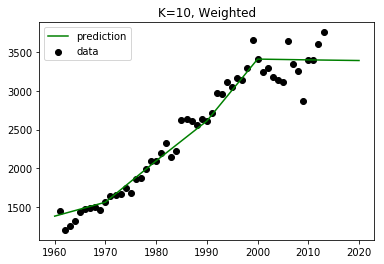

In [10]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(year, bananas)

# Set up our prediction line.
T = np.arange(1960, 2025, 10)[:, np.newaxis]
Y_ = knn_w.predict(T)

#Inspect results
print("R-squared: ",knn_w.score(year,bananas))
score_w = cross_val_score(knn_w, year, bananas, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

#Plot data with prediction
plt.scatter(year, bananas, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

**Discussion Items - Few paragraphs to describing the models' behaviors**

After reviewing the R-squared values and cross validation scores, it appears that all of the models performed similarly, but in general, the weighted KNN model outperformed the KNN model, which outperformed the linear model. While the regression scores were all high (above 0.93), all three had an anomolous cross-validation score which can most likely be attributed to the variance in the data between 2000 and 2010. 

Overall, while the weighted KNN model is preferred, the level of sueriority is somewhat ambiguous. The higher R-squared values can be attributed to the fact that each point in the weighted KNN model reflects the local data as opposed to the global data. Since the data deviates from being linear to having more of an S-shape after the year 2000, the weighted model is able to better reflect this shape than a simple linear regression. 

A situation in which a linear regression may outperform the weighted KNN model is if there are extreme outliers in the data, as these would influence the weighted KNN model more in the area local to the outlier than a linear regression would. It should be noted that there is some risk for the weighted KNN model to overfit the data, and may result in poor cross validation scores.